In [1]:
from cProfile import label
from statistics import mode
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, GRU, SimpleRNN, Dropout, Flatten
from datetime import *
from os import *
from dataprep import *
path='/Users/bsw/Documents/MRPLocal/DATA/'

Next -- build out table of metrics and the runner
Write the metrics to a CSV for storage
Use an init for the first metric build

Run a few test runs to see what else we need to record.



Experiment Plans

Build out models to compare performance on
Look at hyperparameter tuning
ONce models are adequately baked, then move to A and B below

A Experiment on using different patients inputs and keeping track of metrics
B Experiment on using feature engineering and build out metrics further


Implement Data cleaning from development to the data helper functions
Add in ability to look at a per patient basis
Perhaps start with overall data size, and then with a % set to train v test


In [4]:
## Record the results
Execution_time = []
train_rmse_results = []
test_rmse_results=[]
run_id = []
sample_size=[]
epochs = []
batch_size=[]
optimizer=[]
layers=[]
forecast_distance_perf=[]
prev_readings=[]



In [5]:
## Simple RNN Model
## Initialize
model_name = 'SimpleRNN'
num_layers = 3
epochs_num = 10
batch_size_set = 25
optimizer_set = 'adam'
forecast_distance=6
number_readings=6

## Get New Data
a=DataSampling()
a.samplingDF
X_train,X_test,y_train,y_test = a.SampleValidSequences(num_clients=5, test_split=0.3,reading_length=number_readings, forecast_dist=forecast_distance)
#a.SampleValidSequences(num_clients=5, test_split=0.3)
#a.SampleValidSequences(num_clients=5, test_split=0.3,forecast_dist=forecast_distance,reading_length=number_readings)

X_train = np.asarray(X_train)
y_train = np.asarray(y_train)
X_test = np.asarray(X_test)
y_test = np.asarray(y_test)

print (X_train,y_train)
print (type(X_train))

#SETUP THE STACK
model_rnn = Sequential()
model_rnn.add(SimpleRNN(50, activation='relu', input_shape=(8,1)))
model_rnn.add(Dense(10))
model_rnn.add(Dense(1))
#START THE RUN
print('\nRunning RNN model...')
start = datetime.now()

model_rnn.compile(optimizer=optimizer_set, loss='mse', metrics=[tf.keras.metrics.RootMeanSquaredError()])
hist = model_rnn.fit(X_train, y_train, epochs=epochs_num, validation_split=0.2, batch_size=batch_size_set)
train_loss, train_rmse = model_rnn.evaluate(X_train, y_train)
train_time = (datetime.now()-start).total_seconds()
print("\ntraining time %s" % train_time)

#PRINT RESULTS
print(f'RNN Model: \nTraining set has a loss (MSE) of {train_loss} with RMSE metric of {train_rmse}')
#Test set results
test_loss, test_rmse = model_rnn.evaluate(X_test, y_test)
print(f'Test set has a loss (MSE) of {test_loss} with RMSE metric of {test_rmse}\n')

#y_pred = model_rnn.predict(X_test)

Execution_time.append(train_time)
train_rmse_results.append(train_rmse)
test_rmse_results.append(test_rmse)
run_id.append(model_name+str(datetime.now()))
sample_size.append(len(X_train))
epochs.append(epochs_num)
batch_size.append(batch_size_set)
optimizer.append(optimizer_set)
layers.append(num_layers)
forecast_distance_perf.append(forecast_distance)
prev_readings.append(number_readings)

## determine why this is pushing out lists instead of an array

/var/folders/hp/tgzym_cs2ndg_s8866wzcx6r0000gn/T/ipykernel_37554/1175405815.py:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_train = np.asarray(X_train)
/var/folders/hp/tgzym_cs2ndg_s8866wzcx6r0000gn/T/ipykernel_37554/1175405815.py:20: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_test = np.asarray(X_test)
2022-08-02 07:07:57.346777: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-0

[list([8.9, 8.9, 8.9, 8.9, 8.9, 8.7, 8.7, 8.7])
 list([8.9, 8.9, 8.9, 8.9, 8.7, 8.7, 8.7, 8.8])
 list([8.9, 8.9, 8.9, 8.7, 8.7, 8.7, 8.8, 9.1]) ...
 list([8.7, 8.8, 8.9, 9.1, 9.0, 9.0]) list([8.8, 8.9, 9.1, 9.0, 9.0, 9.1])
 list([8.9, 9.1, 9.0, 9.0, 9.1, 9.0])] [10.6 11.  11.1 ...  8.1  7.8  7.7]
<class 'numpy.ndarray'>
Metal device set to: Apple M1

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB


Running RNN model...


ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type list).

In [22]:
metrics_df = pd.DataFrame(list(zip(Execution_time,train_rmse_results,test_rmse_results,run_id,sample_size,epochs,batch_size,optimizer,layers,forecast_distance_perf,
prev_readings))
    ,columns=['Execution_time','train_rmse_results','test_rmse_results','run_id','sample_size','epochs','batch_size','optimizer','layers','forecast_distance_perf',
'prev_readings'])

In [23]:
metrics_df

,Execution_time,train_rmse_results,test_rmse_results,run_id,sample_size,epochs,batch_size,optimizer,layers,forecast_distance_perf,prev_readings
0,230.817503,1.704730,1.759134,SimpleRNN2022-08-01 20:20:30.807480,54981,7,50,adam,3,6,8
1,65.681792,3.117003,3.205294,SimpleRNN2022-08-01 22:02:54.578203,24944,8,100,adam,3,12,8
2,49.711645,2.168479,1.977262,SimpleRNN2022-08-01 22:04:24.851465,41414,3,100,adam,3,6,8


In [8]:

filename='metrics.csv'
metrics_file = os.path.join(path, filename)
## save dataframe 
#metrics_df.to_csv(metrics_file)


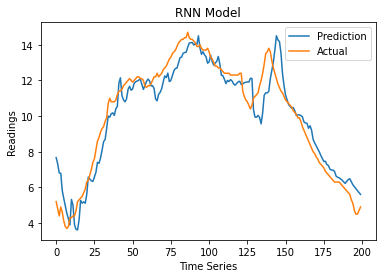

In [38]:

y_pred = model_rnn.predict(X_test)
plt.plot(range(len(y_pred[:200])),y_pred[:200], label='Prediction')
plt.plot(y_test[:200], label='Actual')
plt.xlabel('Time Series')
plt.ylabel('Readings')
plt.title('RNN Model')
plt.legend()
plt.show()

In [15]:
hist_metrics = pd.read_csv(metrics_file)
hist_metrics.drop('Unnamed: 0',axis=1,inplace=True)
hist_metrics


,Execution_time,train_rmse_results,test_rmse_results,run_id,sample_size,epochs,batch_size,optimizer,layers,forecast_distance_perf,prev_readings
0,230.817503,1.70473,1.759134,SimpleRNN2022-08-01 20:20:30.807480,54981,7,50,adam,3,6,8


In [18]:
hist_metrics

,Execution_time,train_rmse_results,test_rmse_results,run_id,sample_size,epochs,batch_size,optimizer,layers,forecast_distance_perf,prev_readings
0,230.817503,1.70473,1.759134,SimpleRNN2022-08-01 20:20:30.807480,54981,7,50,adam,3,6,8


In [16]:
metrics_df

,Execution_time,train_rmse_results,test_rmse_results,run_id,sample_size,epochs,batch_size,optimizer,layers,forecast_distance_perf,prev_readings
0,230.817503,1.704730,1.759134,SimpleRNN2022-08-01 20:20:30.807480,54981,7,50,adam,3,6,8
1,65.681792,3.117003,3.205294,SimpleRNN2022-08-01 22:02:54.578203,24944,8,100,adam,3,12,8
2,49.711645,2.168479,1.977262,SimpleRNN2022-08-01 22:04:24.851465,41414,3,100,adam,3,6,8


In [24]:
filename='metrics_full.csv'
metrics_file2 = os.path.join(path, filename)
metrics_check = pd.read_csv(metrics_file2)
metrics_check

,Unnamed: 0,Execution_time,train_rmse_results,test_rmse_results,run_id,sample_size,epochs,batch_size,optimizer,layers,forecast_distance_perf,prev_readings
0,0,230.817503,1.704730,1.759134,SimpleRNN2022-08-01 20:20:30.807480,54981,7,50,adam,3,6,8
1,0,230.817503,1.704730,1.759134,SimpleRNN2022-08-01 20:20:30.807480,54981,7,50,adam,3,6,8
2,1,65.681792,3.117003,3.205294,SimpleRNN2022-08-01 22:02:54.578203,24944,8,100,adam,3,12,8
3,2,49.711645,2.168479,1.977262,SimpleRNN2022-08-01 22:04:24.851465,41414,3,100,adam,3,6,8


In [20]:

filename='metrics_full.csv'
metrics_file2 = os.path.join(path, filename)
full_metrics=pd.concat([hist_metrics,metrics_df])
#full_metrics
## Write back to file
full_metrics.to_csv(metrics_file2)


In [20]:

print (run_id)

['SimpleRNN2022-07-28 21:17:30.781490']


In [ ]:

def root_mean_error(y_true, y_pred):
    return tf.sqrt(tf.reduce_mean(tf.math.squared_difference(y_true, y_pred)))


class RunModel:

    def __init__(self,X_train, X_test, y_train, y_test):
        #self.X_train = (tf.convert_to_tensor(X_train) - tf.math.reduce_min(tf.convert_to_tensor(X_train))) / (tf.math.reduce_max(tf.convert_to_tensor(X_train)) - tf.math.reduce_min(tf.convert_to_tensor(X_train)))
        #self.y_train = (tf.convert_to_tensor(y_train) - tf.math.reduce_min(tf.convert_to_tensor(y_train))) / (tf.math.reduce_max(tf.convert_to_tensor(y_train)) - tf.math.reduce_min(tf.convert_to_tensor(y_train)))
        #self.X_test = (tf.convert_to_tensor(X_test) - tf.math.reduce_min(tf.convert_to_tensor(X_test))) / (tf.math.reduce_max(tf.convert_to_tensor(X_test)) - tf.math.reduce_min(tf.convert_to_tensor(X_test)))
        #self.y_test = (tf.convert_to_tensor(y_test) - tf.math.reduce_min(tf.convert_to_tensor(y_test))) / (tf.math.reduce_max(tf.convert_to_tensor(y_test)) - tf.math.reduce_min(tf.convert_to_tensor(y_test)))
        self.X_train = np.array(X_train)
        self.y_train = np.array(y_train)
        self.X_test = np.array(X_test)
        self.y_test = np.array(y_test)
        self.metric_df = pd.DataFrame()

    def rnn_model(self):
        model_rnn = Sequential()
        model_rnn.add(SimpleRNN(50, activation='relu', input_shape=(8,1)))
        model_rnn.add(Dense(10))
        model_rnn.add(Dense(1))
        print('\nRunning RNN model...')
        model_rnn.compile(optimizer='adam', loss='mse', metrics=[tf.keras.metrics.RootMeanSquaredError()])
        hist = model_rnn.fit(self.X_train, self.y_train, epochs=7, validation_split=0.2, batch_size=100)
        
        train_loss, train_rmse = model_rnn.evaluate(self.X_train, self.y_train)
        print(f'RNN Model: \nTraining set has a loss (MSE) of {train_loss} with RMSE metric of {train_rmse}')

        test_loss, test_rmse = model_rnn.evaluate(self.X_test, self.y_test)
        print(f'Test set has a loss (MSE) of {test_loss} with RMSE metric of {test_rmse}\n')
        y_pred = model_rnn.predict(self.X_test)
        plt.plot(range(len(y_pred)),y_pred, label='Prediction')
        plt.plot(self.y_test, label='Actual')
        plt.xlabel('Time Series')
        plt.ylabel('Readings')
        plt.title('Simple RNN MODEL')
        plt.legend()
        plt.savefig('Model Fig - SimpleRNN.png')
        plt.clf()
        model_rnn.summary()
        self.metric_df['RNN RMSE'] = hist.history['val_root_mean_squared_error']



    def lstm_model(self):
        model_lstm = Sequential()
        model_lstm.add(LSTM(128, activation='relu', input_shape=(8, 1),return_sequences=True))
        model_lstm.add(Dropout(0.3))
        model_lstm.add(LSTM(64, activation='relu'))
        model_lstm.add(Dropout(0.3))
        model_lstm.add(Dense(20, activation='relu'))
        model_lstm.add(Dense(10, activation='relu'))
        model_lstm.add(Dense(1))
        print('\nRunning the LSTM model...')
        model_lstm.compile(optimizer='adam', loss='mse', metrics=[tf.keras.metrics.RootMeanSquaredError()])
        hist = model_lstm.fit(self.X_train, self.y_train, epochs=7, validation_split=0.2, batch_size=100)
        
        train_loss, train_rmse = model_lstm.evaluate(self.X_train, self.y_train)
        print(f'LSTM Model: \nTraining set has a loss (MSE) of {train_loss} with RMSE metric of {train_rmse}')

        test_loss, test_rmse = model_lstm.evaluate(self.X_test, self.y_test)
        print(f'Test set has a loss (MSE) of {test_loss} with RMSE metric of {test_rmse}\n')
        y_pred = model_lstm.predict(self.X_test)
        plt.plot(range(len(y_pred)),y_pred, label='Prediction')
        plt.plot(self.y_test, label='Actual')
        plt.xlabel('Time Series')
        plt.ylabel('Readings')
        plt.title('LSTM MODEL')
        plt.legend()
        plt.savefig('Model Fig - LSTM.png')
        plt.clf()
        model_lstm.summary()
        self.metric_df['LSTM RMSE'] = hist.history['val_root_mean_squared_error']


    def gru_model(self):
        model_gru = Sequential()
        model_gru.add(GRU(50, activation='relu', input_shape=(8,1)))
        model_gru.add(Dense(1))
        print('\nRunning GRU model...')
        model_gru.compile(optimizer='adam', loss='mse', metrics=[tf.keras.metrics.RootMeanSquaredError()])
        hist = model_gru.fit(self.X_train, self.y_train, epochs=7, validation_split=0.2, batch_size=100)
        
        train_loss, train_rmse = model_gru.evaluate(self.X_train, self.y_train)
        print(f'GRU Model: \nTraining set has a loss (MSE) of {train_loss} with RMSE metric of {train_rmse}')

        test_loss, test_rmse = model_gru.evaluate(self.X_test, self.y_test)
        print(f'Test set has a loss (MSE) of {test_loss} with RMSE metric of {test_rmse}\n')
        y_pred = model_gru.predict(self.X_test)
        plt.plot(range(len(y_pred)),y_pred, label='Prediction')
        plt.plot(self.y_test, label='Actual')
        plt.xlabel('Time Series')
        plt.ylabel('Readings')
        plt.title('GRU MODEL')
        plt.legend()
        plt.savefig('Model Fig - GRU.png')
        plt.clf()
        model_gru.summary()
        self.metric_df['GRU RMSE'] = hist.history['val_root_mean_squared_error']


    def cnn_lstm_model(self):
        model_cnn_lstm = Sequential()
        model_cnn_lstm.add(tf.keras.layers.Conv1D(32, 2, activation='relu', input_shape=(8,1)))
        model_cnn_lstm.add(tf.keras.layers.MaxPooling1D((1)))
        model_cnn_lstm.add(LSTM(10, activation='relu', return_sequences=True))
        model_cnn_lstm.add(Flatten())
        model_cnn_lstm.add(Dense(1))
        print('\nRunning the CNN+LSTM model...')
        model_cnn_lstm.compile(optimizer='adam', loss='mse', metrics=[tf.keras.metrics.RootMeanSquaredError()])
        hist = model_cnn_lstm.fit(self.X_train, self.y_train, epochs=7, validation_split=0.2, batch_size=100)
        
        train_loss, train_rmse = model_cnn_lstm.evaluate(self.X_train, self.y_train)
        print(f'CNN+LSTM Model: \nTraining set has a loss (MSE) of {train_loss} with RMSE metric of {train_rmse}')

        test_loss, test_rmse = model_cnn_lstm.evaluate(self.X_test, self.y_test)
        print(f'Test set has a loss (MSE) of {test_loss} with RMSE metric of {test_rmse}\n')
        y_pred = model_cnn_lstm.predict(self.X_test)
        print(y_pred.shape)
        plt.plot(range(len(y_pred)),y_pred, label='Prediction')
        plt.plot(self.y_test, label='Actual')
        plt.xlabel('Time Series')
        plt.ylabel('Readings')
        plt.title('CNN+LSTM MODEL')
        plt.legend()
        plt.savefig('Model Fig - CNN+LSTM.png')
        plt.clf()
        model_cnn_lstm.summary()
        self.metric_df['CNN+LSTM RMSE'] = hist.history['val_root_mean_squared_error']


    def main(self):
        self.rnn_model()
        self.lstm_model()
        self.gru_model()
        self.cnn_lstm_model()
        self.metric_df.plot(xlabel='Epochs', ylabel='RMSE', legend=True)
        plt.show()


In [6]:


def seriesToTimeSeries(self, X, step_length=8,forecast_dist=6):
    y=[]
    reshapedX = []
    for i in range(len(X)-forecast_dist-step_length):
        y.append(X[i+step_length+forecast_dist])
        reshapedX.append(X[i:i+step_length])
    return reshapedX,y

def shapeSeriesFromDF(df,indexForSelection):
    
    an_X = df[df['series_id']==indexForSelection[0]].ValueMMOL.tolist()
    an_X, y = seriesToTimeSeries(an_X)
    X_=an_X
    y_=y

    for i in indexForSelection[1:]:
        an_X = df[df['series_id']==i].ValueMMOL.tolist()
        an_X, y = seriesToTimeSeries(an_X)
        
        X_ = X_+an_X
        y_ = y_+y
    return X_,y_



def SampleValidSequences(self, num_clients=8, test_split=0.3,seed=1):
    samplingDF = self.samplingDF
    ## cleaning up the data -- Resetting data types
    
    random.seed(seed)
    
    new_df = samplingDF.groupby('series_id').count()
    ct_df = samplingDF.groupby('PtID').count()

    client_list = ct_df.index.to_numpy()
    cl_ind = client_list[random.sample(range(0,len(client_list)),num_clients)] ##clientids to use for the training

    cl_df = samplingDF[samplingDF.PtID.isin(cl_ind)] ## list of all samples relative to these clients

    series_select = cl_df.groupby('series_id').count()
    series_select = series_select.sample(frac=1)
    series_select = series_select.index.to_list()

    index_cut = int((1-test_split) * len(series_select))
    train_index = series_select[0:index_cut]
    test_index=series_select[index_cut:]

    training_df = samplingDF[samplingDF.series_id.isin(train_index)]
    testing_df = samplingDF[samplingDF.series_id.isin(test_index)]

    ## build training dataset
    X_train,y_train = shapeSeriesFromDF(training_df,train_index)
    X_test,y_test = shapeSeriesFromDF(testing_df,test_index)

    return X_train, X_test, y_train, y_test



In [8]:
x,y=shapeSeriesFromDF(a.samplingDF,[1,3,45])  

TypeError: seriesToTimeSeries() missing 1 required positional argument: 'X'